In [195]:
import pandas as pd
import numpy as np

df = pd.read_parquet('/home/jupyter/datasphere/vk/train.parquet')

df

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [196]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
None


In [197]:
df_test = pd.read_parquet('/home/jupyter/datasphere/vk/test.parquet')
df_test 

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."
...,...,...,...
19995,80341,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[3.01, -0.58, 1.55, 0.48, -0.35, 1.93, 3.86, 2..."
19996,5891,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[0.66, 1.3, 2.78, -0.25, -1.97, -0.55, -1.08, ..."
19997,29091,"[2017-01-01, 2017-02-01, 2017-03-01, 2017-04-0...","[0.09, 0.44, 1.55, 0.15, 0.3, 0.19, 0.34, 1.05..."
19998,85877,"[2017-04-01, 2017-05-01, 2017-06-01, 2017-07-0...","[0.28, 1.92, 1.14, 2.4, 1.46, 1.08, -0.12, 0.6..."


# EDA

## Проверка гипотезы о нормальном распределении с помощью теста Шапиро

In [198]:
df['label'].value_counts()

0.0    57820
1.0    22180
Name: label, dtype: int64

In [199]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

def check_normality(values):
    # Применяем тест Шапиро-Уилка
    stat, p_value = shapiro(values)
    # Уровень значимости
    alpha = 0.05
    # Проверка гипотезы
    if p_value > alpha:
        return True  # Данные нормально распределены
    else:
        return False  # Данные не нормально распределены

# Применяем функцию к каждому массиву значений
df['is_normal'] = df['values'].apply(check_normality)

In [200]:
df['is_normal'].sum() ## В елом видно, что 66 процентов данных в values распределены нормально

53485

In [201]:
# Функция для замены выбросов
def replace_outliers(row):
    values = np.array(row['values'])
    mean = np.mean(values)
    std = np.std(values)
    
    # Определение границ для выбросов
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    # Замена выбросов на медиану
    median_value = np.mean(values)
    values = np.where((values < lower_bound) | (values > upper_bound), median_value, values)
    
    return values.tolist()

# Применение функции к каждой строке
df['values'] = df.apply(replace_outliers, axis=1)

print(df)


          id  ... is_normal
0      19114  ...      True
1      22769  ...      True
2      76935  ...      True
3      66297  ...      True
4       2191  ...      True
...      ...  ...       ...
79995  71474  ...     False
79996  36908  ...      True
79997  63517  ...      True
79998  94731  ...     False
79999  98870  ...      True

[80000 rows x 5 columns]


In [202]:
df

,id,dates,values,label,is_normal
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,True
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,True
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,True
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,True
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,True
...,...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,False
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,True
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,True
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,False


In [203]:
## проверим на нормальность  еще раз

def check_normality(values):
    # Применяем тест Шапиро-Уилка
    stat, p_value = shapiro(values)
    # Уровень значимости
    alpha = 0.05
    # Проверка гипотезы
    if p_value > alpha:
        return True  # Данные нормально распределены
    else:
        return False  # Данные не нормально распределены

# Применяем функцию к каждому массиву значений
df['is_normal'] = df['values'].apply(check_normality)

In [205]:
df['is_normal'].sum() ## теперь 72 процента

57902

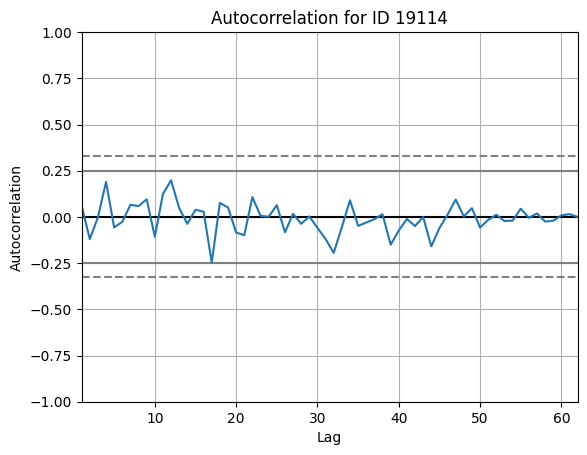

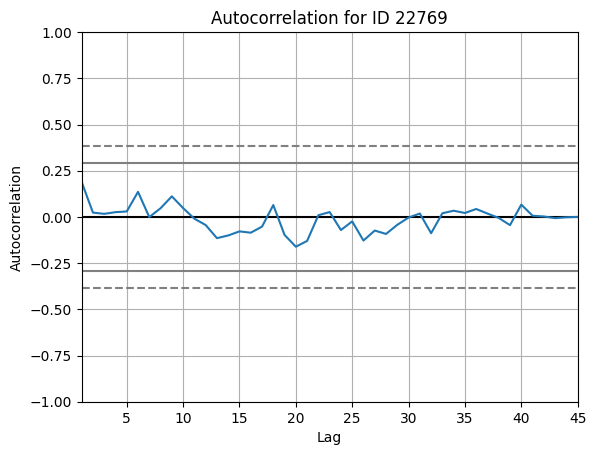

In [206]:
def plot_autocorrelation(values, title):
    pd.plotting.autocorrelation_plot(values)
    plt.title(title)
    plt.show()

i = 0
for idx, row in df.iterrows():
    if i==2:
        break
    
    plot_autocorrelation(row['values'], f"Autocorrelation for ID {row['id']}")
    i+=1

In [207]:
df.drop(columns = 'is_normal', inplace = True)

In [208]:
df

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [209]:
import pandas as pd

# Преобразование строковых дат в datetime
df['dates'] = df['dates'].apply(lambda x: pd.to_datetime(x))

# Признаки
df['start_date'] = df['dates'].apply(lambda x: x[0])  # первая дата
df['end_date'] = df['dates'].apply(lambda x: x[-1])   # последняя дата
df['duration_days'] = df['end_date'] - df['start_date']  # продолжительность периода

# Пример извлечения года и месяца из первой даты
df['start_year'] = df['start_date'].apply(lambda x: x.year)
df['start_month'] = df['start_date'].apply(lambda x: x.month)

# Пример извлечения среднего временного интервала между датами
df['mean_interval_days'] = df['dates'].apply(lambda x: (x[-1] - x[0]).days / len(x) if len(x) > 1 else 0)


In [210]:
df.drop(columns = 'dates', inplace = True)

In [211]:
df

,id,values,label,start_date,end_date,duration_days,start_year,start_month,mean_interval_days
0,19114,"[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,2016-01-01,2021-02-01,1858 days,2016,1,29.967742
1,22769,"[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,2016-05-01,2020-01-01,1340 days,2016,5,29.777778
2,76935,"[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,2017-03-01,2021-02-01,1433 days,2017,3,29.854167
3,66297,"[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,2016-01-01,2019-12-01,1430 days,2016,1,29.791667
4,2191,"[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,2016-01-01,2020-08-01,1674 days,2016,1,29.892857
...,...,...,...,...,...,...,...,...,...
79995,71474,"[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,2018-10-01,2023-04-01,1643 days,2018,10,29.872727
79996,36908,"[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,2016-07-01,2020-11-01,1584 days,2016,7,29.886792
79997,63517,"[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,2016-03-01,2020-05-01,1522 days,2016,3,29.843137
79998,94731,"[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,2016-02-01,2021-04-01,1886 days,2016,2,29.936508


## Заменяем каждую строку в values на отдельный признак

In [212]:
# Агрегация
df['median'] = df['values'].apply(np.median)
df['mean'] = df['values'].apply(np.mean)
df['std'] = df['values'].apply(np.std)
df['min'] = df['values'].apply(np.min)
df['max'] = df['values'].apply(np.max)
df['last_value']  = df['values'].apply(lambda x: x[-1])
df['sum'] = df['values'].apply(np.sum)
df['coef_of_variation'] = df['std'] / df['mean']
df['ema'] = df['values'].apply(lambda x: pd.Series(x).ewm(span=3).mean().iloc[-1])
from scipy.stats import linregress
df['trend_slope'] = df['values'].apply(lambda x: linregress(range(len(x)), x)[0])
df['length'] = df['values'].apply(len)
df['kurtosis'] = df['values'].apply(lambda x: pd.Series(x).kurtosis())


In [213]:
df.drop(columns = 'values', inplace = True)

/tmp/ipykernel_2197/3815763107.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = ('coolwarm'))


<Axes: >

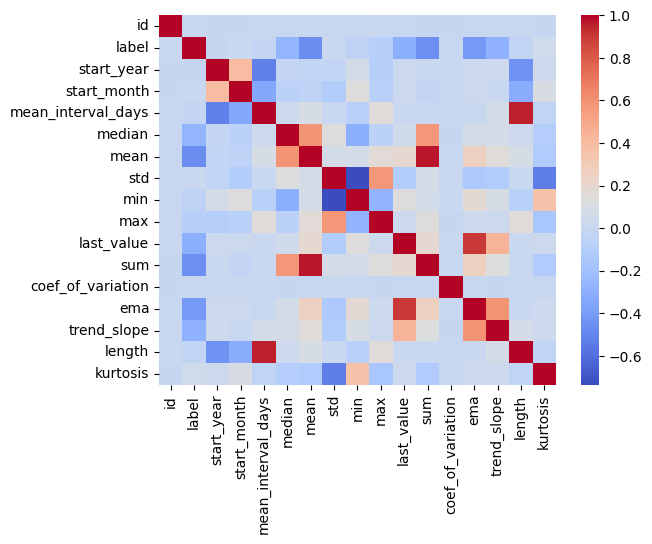

In [214]:
import seaborn as sns

sns.heatmap(df.corr(), cmap = ('coolwarm'))


In [215]:
df.head()

,id,label,start_date,end_date,duration_days,start_year,start_month,mean_interval_days,median,mean,std,min,max,last_value,sum,coef_of_variation,ema,trend_slope,length,kurtosis
0,19114,0.0,2016-01-01,2021-02-01,1858 days,2016,1,29.967742,-0.050000,0.102157,1.183470,-2.280000,3.49,-0.570000,6.333710,11.584857,-0.311900,-0.015754,62,0.338155
1,22769,1.0,2016-05-01,2020-01-01,1340 days,2016,5,29.777778,-0.274409,-0.310777,1.556337,-3.534409,2.92,-0.054409,-13.984957,-5.007893,-0.296800,-0.026755,45,0.025976
2,76935,0.0,2017-03-01,2021-02-01,1433 days,2017,3,29.854167,-0.145000,-0.046042,1.065023,-1.950000,2.61,-0.420000,-2.210000,-23.131720,-0.160939,-0.032482,48,-0.167206
3,66297,0.0,2016-01-01,2019-12-01,1430 days,2016,1,29.791667,-0.345000,-0.130000,1.158201,-2.220000,2.49,1.590000,-6.240000,-8.909237,1.303831,0.049298,48,-0.809032
4,2191,0.0,2016-01-01,2020-08-01,1674 days,2016,1,29.892857,-0.475000,-0.270536,1.270529,-2.500000,2.87,-0.750000,-15.150000,-4.696345,-1.095591,-0.011478,56,-0.527906


# Обучение

In [133]:
%pip -q install catboost


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


## В данных наблюдался дисбаланс, поэтому добавил auto_class_weights

In [216]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


# Разделяем на обучающую и тестовую выборки
X = df.drop(columns=['id', 'label'])##убрал незначимые признаки
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация CatBoostClassifier
model = CatBoostClassifier(iterations=150, learning_rate=0.1, depth=6, verbose=0,loss_function='Logloss',auto_class_weights='Balanced')

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
rocc = roc_auc_score(y_test,y_pred)
print(f'Roc_auc_score: {rocc:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Roc_auc_score: 0.81
Accuracy: 0.81


In [233]:
model.save_model('catboost_model.cbm')

## Проверяем обобщающую способность модели

In [217]:
from catboost import cv

train_data = Pool(data=X_train, label=y_train)
cv_results = cv(train_data, model.get_params(), fold_count=5)

Training on fold [0/5]

bestTest = 0.4086305706
bestIteration = 148

Training on fold [1/5]

bestTest = 0.4128878842
bestIteration = 149

Training on fold [2/5]

bestTest = 0.4051028819
bestIteration = 149

Training on fold [3/5]

bestTest = 0.4125064775
bestIteration = 149

Training on fold [4/5]

bestTest = 0.4092113052
bestIteration = 149



In [ ]:
## с помощью кросс-валидации получили, что модель хорошо обобщает данные и стабильна.

## ROC-curve

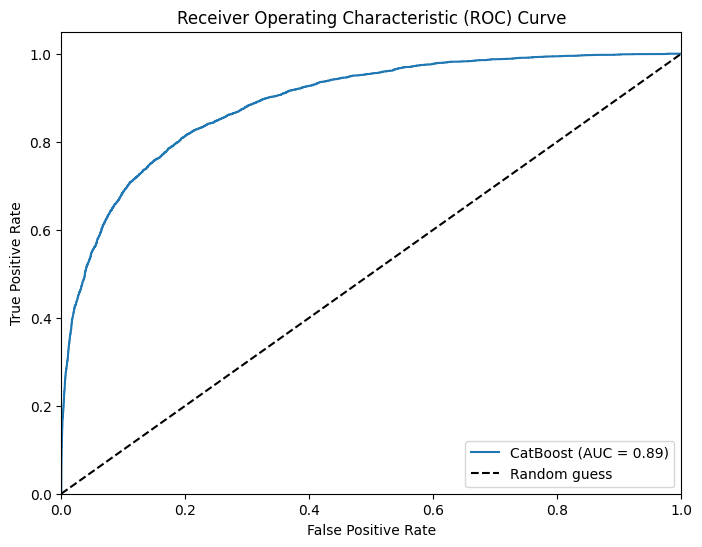

In [218]:
import matplotlib.pyplot as plt

# Предсказание вероятностей для положительного класса
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


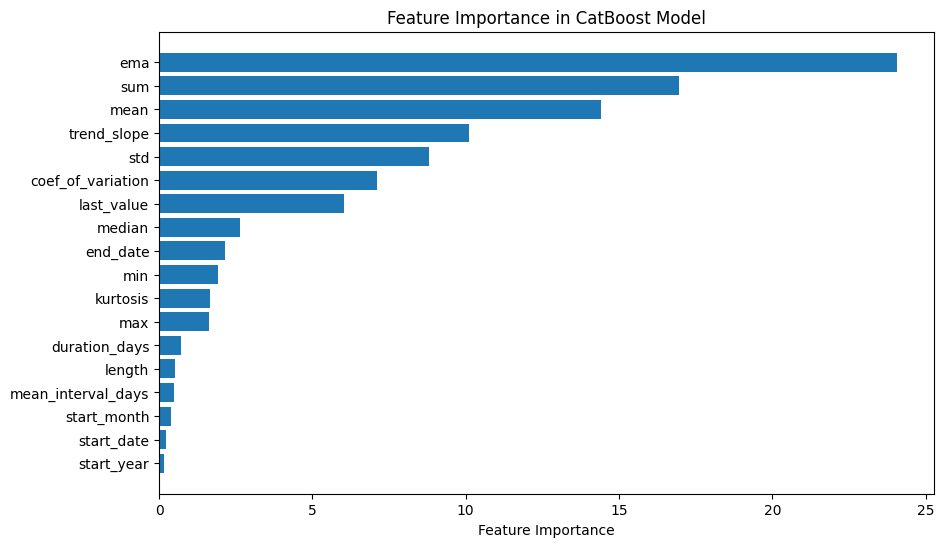

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Получение значимости признаков
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# Построение графика значимости признаков
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]  # Сортируем по убыванию важности
plt.barh(range(len(feature_importances)), feature_importances[indices], align='center')
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CatBoost Model')
plt.gca().invert_yaxis()  # Инвертируем ось для сортировки сверху вниз
plt.show()


# Предсказание на test

In [221]:
df_test

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."
...,...,...,...
19995,80341,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[3.01, -0.58, 1.55, 0.48, -0.35, 1.93, 3.86, 2..."
19996,5891,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[0.66, 1.3, 2.78, -0.25, -1.97, -0.55, -1.08, ..."
19997,29091,"[2017-01-01, 2017-02-01, 2017-03-01, 2017-04-0...","[0.09, 0.44, 1.55, 0.15, 0.3, 0.19, 0.34, 1.05..."
19998,85877,"[2017-04-01, 2017-05-01, 2017-06-01, 2017-07-0...","[0.28, 1.92, 1.14, 2.4, 1.46, 1.08, -0.12, 0.6..."


In [222]:
import pandas as pd

# Преобразование строковых дат в datetime
df_test['dates'] = df_test['dates'].apply(lambda x: pd.to_datetime(x))

# Признаки
df_test['start_date'] = df_test['dates'].apply(lambda x: x[0])  # первая дата
df_test['end_date'] = df_test['dates'].apply(lambda x: x[-1])   # последняя дата
df_test['duration_days'] = df_test['end_date'] - df_test['start_date']  # продолжительность периода

# Пример извлечения года и месяца из первой даты
df_test['start_year'] = df_test['start_date'].apply(lambda x: x.year)
df_test['start_month'] = df_test['start_date'].apply(lambda x: x.month)

# Пример извлечения среднего временного интервала между датами
df_test['mean_interval_days'] = df_test['dates'].apply(lambda x: (x[-1] - x[0]).days / len(x) if len(x) > 1 else 0)


In [223]:
# Агрегация
df_test['median'] = df_test['values'].apply(np.median)
df_test['mean'] = df_test['values'].apply(np.mean)
df_test['std'] = df_test['values'].apply(np.std)
df_test['min'] = df_test['values'].apply(np.min)
df_test['max'] = df_test['values'].apply(np.max)
df_test['last_value']  = df_test['values'].apply(lambda x: x[-1])
df_test['sum'] = df_test['values'].apply(np.sum)
df_test['coef_of_variation'] = df_test['std'] / df_test['mean']
df_test['ema'] = df_test['values'].apply(lambda x: pd.Series(x).ewm(span=3).mean().iloc[-1])

from scipy.stats import linregress
df_test['trend_slope'] = df_test['values'].apply(lambda x: linregress(range(len(x)), x)[0])
df_test['length'] = df_test['values'].apply(len)
df_test['kurtosis'] = df_test['values'].apply(lambda x: pd.Series(x).kurtosis())


In [224]:
df_test.drop(columns = ['dates','values'], inplace = True)

In [225]:
df_test

,id,start_date,end_date,duration_days,start_year,start_month,mean_interval_days,median,mean,std,min,max,last_value,sum,coef_of_variation,ema,trend_slope,length,kurtosis
0,6125,2016-01-01,2020-09-01,1705 days,2016,1,29.912281,-0.010,0.037895,1.505985,-3.140000,3.13,-0.270000,2.160000,39.741282,-0.770859,-0.010018,57,-0.342699
1,26781,2016-01-01,2020-07-01,1643 days,2016,1,29.872727,-0.080,-0.016909,1.249663,-2.240000,3.85,2.380000,-0.930000,-73.904804,0.678527,-0.009304,55,1.058050
2,13333,2016-06-01,2020-12-01,1644 days,2016,6,29.890909,-0.160,-0.039569,1.000514,-1.450000,3.46,1.387809,-2.176292,-25.285321,0.712297,0.025446,55,1.296155
3,53218,2016-01-01,2022-06-01,2343 days,2016,1,30.038462,0.110,0.159231,1.313112,-2.730000,3.43,-0.680000,12.420000,8.246598,-0.543768,-0.008521,78,0.022481
4,84204,2016-01-01,2021-05-01,1947 days,2016,1,29.953846,-0.090,-0.094705,1.243279,-2.660000,2.57,-1.497317,-6.155851,-13.127864,-1.200098,-0.024730,65,-0.479235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,80341,2016-03-01,2022-12-01,2466 days,2016,3,30.073171,-0.275,-0.022217,1.077283,-1.550000,3.86,-0.483638,-1.821829,-48.488220,-0.340915,-0.004308,82,2.963392
19996,5891,2016-01-01,2022-10-01,2465 days,2016,1,30.060976,0.260,0.072439,1.381959,-3.000000,2.78,1.550000,5.940000,19.077551,0.393947,0.002278,82,-0.602788
19997,29091,2017-01-01,2021-07-01,1642 days,2017,1,29.854545,0.290,0.068727,1.173802,-3.660000,1.91,1.730000,3.780000,17.079129,1.035280,0.002200,55,1.753140
19998,85877,2017-04-01,2021-01-01,1371 days,2017,4,29.804348,-0.180,-0.037175,1.177763,-2.801675,2.40,-2.801675,-1.710050,-31.681577,-1.716250,-0.061743,46,-0.574782


In [226]:
y_pred_proba = model.predict_proba(df_test)[:, 1]

In [227]:
y_pred_proba

array([0.25000398, 0.18876139, 0.40797593, ..., 0.0444282 , 0.70952057,
       0.02885293])

In [228]:
res = pd.DataFrame(y_pred_proba)

In [229]:
res = pd.concat([df_test['id'],res], axis = 1)

In [230]:
res

,id,0
0,6125,0.250004
1,26781,0.188761
2,13333,0.407976
3,53218,0.086910
4,84204,0.728793
...,...,...
19995,80341,0.235831
19996,5891,0.042769
19997,29091,0.044428
19998,85877,0.709521


In [231]:
result = res.rename(columns = {0:'score'})

In [232]:
import pandas as pd

# Сохраняем DataFrame в CSV
result.to_csv('result.csv', index=False)

# Загружаем файл для скачивания
from IPython.display import FileLink
FileLink('result.csv')


/home/jupyter/datasphere/vk/result.csv